# Morphology for Single Cells 

This section will serve as an introduction to the Allen Cell Types database. We'll work with the AllenSDK to see what information we can gain about our cells.

First, we'll `import` the CellTypesCache module. This module provides tools to allow us to get information from the cell types database. We're giving it a **manifest** filename as well. CellTypesCache will create this manifest file, which contains metadata about the cache. You can look under cell_types in your directory, and take a look at the file.

(If you're curious you can see the full documentation for the core package <a href="https://allensdk.readthedocs.io/en/latest/allensdk.core.html">here</a>.)

<b>Note</b>: In order to run the line below, you need to have the AllenSDK installed. You can find information on how to do that <a href="http://alleninstitute.github.io/AllenSDK/install.html">here</a>. If you're running this on the UCSD Datahub, the Allen SDK has already been installed for you.

In [81]:
#Import the "Cell Types Cache" from the AllenSDK core package
from allensdk.core.cell_types_cache import CellTypesCache

#Import CellTypesApi, which will allow us to query the database.
from allensdk.api.queries.cell_types_api import CellTypesApi

# We'll then initialize the cache as 'ctc' (cell types cache)
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

The `get_cells` method downloads metadata for all cells in the database. The database contains human cells and mouse cells. Alternatively, one can filter out the database to only include cells collected from a certain species.
Look through <a href="https://allensdk.readthedocs.io/en/latest/allensdk.core.cell_types_cache.html">the documentation for the CellTypesCache</a> for more information on the `get_cells` method.

In [82]:
# download all cells 
all_cells = ctc.get_cells()
print(all_cells)

[{'reporter_status': None, 'cell_soma_location': [273.0, 354.0, 216.0], 'species': 'Homo Sapiens', 'id': 525011903, 'name': 'H16.03.003.01.14.02', 'structure_layer_name': '3', 'structure_area_id': 12113, 'structure_area_abbrev': 'FroL', 'transgenic_line': '', 'dendrite_type': 'spiny', 'apical': 'intact', 'reconstruction_type': None, 'disease_state': 'epilepsy', 'donor_id': 524848408, 'structure_hemisphere': 'right', 'normalized_depth': None}, {'reporter_status': 'positive', 'cell_soma_location': [8966.56330957526, 1429.52689052075, 8567.389672505], 'species': 'Mus musculus', 'id': 565871768, 'name': 'Oxtr-2A-Cre;Ai14-293837.03.01.02', 'structure_layer_name': '5', 'structure_area_id': 385, 'structure_area_abbrev': 'VISp', 'transgenic_line': 'Oxtr-T2A-Cre', 'dendrite_type': 'aspiny', 'apical': 'NA', 'reconstruction_type': None, 'disease_state': '', 'donor_id': 563340157, 'structure_hemisphere': 'left', 'normalized_depth': 0.582056591439023}, {'reporter_status': 'positive', 'cell_soma_loc

As you can see, the output for the metadata of our cells is messy and difficutlt to interpret. To make our data easier to read and work with, we can convert `all_cells` into a pandas datadrame.


Note: If you're having trouble with Pandas, it can help to look at <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/">the user guide</a>.

In [83]:
import pandas as pd 
import numpy as np

# Create a dataframe from 'human_cells' and re-assign the dataframe to a new variable
all_cells_df = pd.DataFrame(all_cells)
all_cells_df.head()

,reporter_status,cell_soma_location,species,id,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,reconstruction_type,disease_state,donor_id,structure_hemisphere,normalized_depth
0,None,"[273.0, 354.0, 216.0]",Homo Sapiens,525011903,H16.03.003.01.14.02,3,12113,FroL,,spiny,intact,None,epilepsy,524848408,right,NaN
1,positive,"[8966.56330957526, 1429.52689052075, 8567.3896...",Mus musculus,565871768,Oxtr-2A-Cre;Ai14-293837.03.01.02,5,385,VISp,Oxtr-T2A-Cre,aspiny,NA,None,,563340157,left,0.582057
2,positive,"[7872.53138541818, 993.212032389272, 3127.1530...",Mus musculus,469801138,Pvalb-IRES-Cre;Ai14-170927.05.02.01,4,385,VISp,Pvalb-IRES-Cre,aspiny,NA,None,,319194354,right,0.469578
3,None,"[69.0, 254.0, 96.0]",Homo Sapiens,528642047,H16.06.009.01.02.06.05,5,12141,MTG,,aspiny,NA,None,epilepsy,528574320,left,NaN
4,positive,"[9400.0, 1520.74232706376, 2188.13845194139]",Mus musculus,605889373,Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-337419.0...,2/3,385,VISp,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre,aspiny,NA,None,,605622695,right,NaN


If we look back at our dataframe, our rows don't have any useful information -- they're simply a list of indices starting from zero. We can reassign the row values by using the method `set_index()`. Since each cell in the dataframe has a unique `id`, the `id` will be set as the index.

In [84]:
all_cells_df = all_cells_df.set_index('id')
all_cells_df.head()

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,reconstruction_type,disease_state,donor_id,structure_hemisphere,normalized_depth
id,,,,,,,,,,,,,,,
525011903,None,"[273.0, 354.0, 216.0]",Homo Sapiens,H16.03.003.01.14.02,3,12113,FroL,,spiny,intact,None,epilepsy,524848408,right,NaN
565871768,positive,"[8966.56330957526, 1429.52689052075, 8567.3896...",Mus musculus,Oxtr-2A-Cre;Ai14-293837.03.01.02,5,385,VISp,Oxtr-T2A-Cre,aspiny,NA,None,,563340157,left,0.582057
469801138,positive,"[7872.53138541818, 993.212032389272, 3127.1530...",Mus musculus,Pvalb-IRES-Cre;Ai14-170927.05.02.01,4,385,VISp,Pvalb-IRES-Cre,aspiny,NA,None,,319194354,right,0.469578
528642047,None,"[69.0, 254.0, 96.0]",Homo Sapiens,H16.06.009.01.02.06.05,5,12141,MTG,,aspiny,NA,None,epilepsy,528574320,left,NaN
605889373,positive,"[9400.0, 1520.74232706376, 2188.13845194139]",Mus musculus,Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-337419.0...,2/3,385,VISp,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre,aspiny,NA,None,,605622695,right,NaN


As you may have noticed already, out current dataframe only contains metadeta about our cells and no information on the morphology or electrophysiolgy of our cells. In order to get information about the morphology of these cells, we need to use the `get_morphology_features()` method on our instance of the cell types cache. We will set the indices to be the `specimen_id` because these ids will align with those in `all_cells_df`.

In [85]:
# downloads the morphology features and sets up the dataframe all in one line
morphology_df = pd.DataFrame(ctc.get_morphology_features()).set_index('specimen_id')
print('Length of dataframe:')
print(len(morphology_df))
morphology_df.head()

Length of dataframe:
701


,average_bifurcation_angle_local,average_bifurcation_angle_remote,average_contraction,average_diameter,average_fragmentation,average_parent_daughter_ratio,hausdorff_dimension,id,max_branch_order,max_euclidean_distance,...,overall_width,scale_factor_x,scale_factor_y,scale_factor_z,soma_surface,superseded,tags,total_length,total_surface,total_volume
specimen_id,,,,,,,,,,,,,,,,,,,,,
478107198,82.727781,NaN,0.864267,0.345092,20.723077,0.964510,NaN,491119743,6.0,99.779724,...,136.267522,0.1144,0.1144,0.28,435.740270,False,3D Neuron Reconstruction morphology,1666.082926,1803.875644,167.343086
502367941,82.506680,NaN,0.903890,0.634047,105.277778,0.862183,NaN,546781359,3.0,432.383110,...,370.170045,0.1144,0.1144,0.28,1446.587725,False,3D Neuron Reconstruction morphology,2277.259374,4543.139073,921.571895
515771244,77.536678,NaN,0.863104,0.417929,73.666667,0.926633,NaN,537042261,6.0,373.630444,...,381.015114,0.1144,0.1144,0.28,287.118123,False,3D Neuron Reconstruction morphology,3589.339062,4704.910407,582.285423
561435279,76.583222,NaN,0.900537,0.400396,95.979167,0.942049,NaN,689123605,11.0,943.382549,...,524.550156,0.1144,0.1144,0.28,180.994813,False,3D Neuron Reconstruction morphology,5416.228778,6814.933290,740.722806
591268268,72.019250,NaN,0.873518,0.227626,47.535714,1.000000,NaN,657879305,5.0,186.218009,...,261.459057,0.1144,0.1144,0.28,55.055236,False,3D Neuron Reconstruction morphology,1659.465869,1185.773462,69.144146


Now we have two dataframes, one with the metadata for our cells (indexed by id) and another with the morphology data for all cells, also indexed by id. Usefully, these ids are unique to each cell, meaning we can match them across dataframes.

We can use either the `merge` or `join` pandas methods in order to pull all of this data into one dataframe. 

![](http://www.datasciencemadesimple.com/wp-content/uploads/2017/09/join-or-merge-in-python-pandas-1.png)

There are different types of joins/merges you can do in pandas, illustrated <a href="http://www.datasciencemadesimple.com/join-merge-data-frames-pandas-python/">above</a>. Here, we want to do an **inner** merge, where we're only keeping entries with indices that are in both dataframes. We could do this merge based on columns, alternatively.

**Inner** is the default kind of join, so we do not need to specify it. And by default, join will use the 'left' dataframe, in other words, the dataframe that is executing the `join` method.

If you need more information, look at the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html">join</a> and <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html">merge</a> documentation: you can use either of these to unite your dataframes, though join will be simpler!

In [86]:
meta_morph_df = all_cells_df.join(morphology_df)
meta_morph_df.head()

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,...,overall_width,scale_factor_x,scale_factor_y,scale_factor_z,soma_surface,superseded,tags,total_length,total_surface,total_volume
313860745,positive,"[9582.4439484807, 1397.13172221305, 8104.93589...",Mus musculus,Rorb-IRES2-Cre-D;Ai14-168047.01.02.01,5,385,VISp,Rorb-IRES2-Cre,spiny,truncated,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313861411,positive,"[8163.71831638966, 737.363292309386, 3757.0401...",Mus musculus,Pvalb-IRES-Cre;Ai14-165172.05.02.01,4,533,VISpm,Pvalb-IRES-Cre,aspiny,NA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313861539,positive,"[7805.75587107124, 974.54485808898, 3187.22594...",Mus musculus,Pvalb-IRES-Cre;Ai14-165171.06.02.01,4,385,VISp,Pvalb-IRES-Cre,aspiny,NA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313861608,positive,"[9349.44051500564, 1314.78991021449, 3245.6530...",Mus musculus,Pvalb-IRES-Cre;Ai14-165874.04.02.01,5,385,VISp,Pvalb-IRES-Cre,aspiny,NA,...,358.994232,0.1144,0.1144,0.28,514.500853,False,3D Neuron Reconstruction morphology,3538.87678,6041.095769,945.09308
313861677,positive,"[8440.72712445293, 861.63534367222, 7873.85645...",Mus musculus,Rorb-IRES2-Cre-D;Ai14-166229.04.01.01,4,385,VISp,Rorb-IRES2-Cre,spiny,truncated,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Note**: Notice that when we combine our metadata with our morphology data, we get a lot of NaN values in our morphology columns. This is becasue not all cells in our dataset will have morphology data. To only download cells that have morphology data from our database, make sure to specify `require_morphology= True,` when calling `get_cells()`.

In [87]:
cells_morph_only = pd.DataFrame(ctc.get_cells(require_morphology = True)).set_index('id')
new_df = cells_morph_only.join(morphology_df)
new_df.head()

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,...,overall_width,scale_factor_x,scale_factor_y,scale_factor_z,soma_surface,superseded,tags,total_length,total_surface,total_volume
313861608,positive,"[9349.44051500564, 1314.78991021449, 3245.6530...",Mus musculus,Pvalb-IRES-Cre;Ai14-165874.04.02.01,5,385,VISp,Pvalb-IRES-Cre,aspiny,NA,...,358.994232,0.1144,0.1144,0.28,514.500853,False,3D Neuron Reconstruction morphology,3538.876780,6041.095769,945.093080
313862022,positive,"[9489.24257509068, 1423.65239028148, 2785.4430...",Mus musculus,Scnn1a-Tg2-Cre;Ai14-167081.03.02.01,4,385,VISp,Scnn1a-Tg2-Cre,spiny,intact,...,287.122628,0.1144,0.1144,0.28,268.777679,False,3D Neuron Reconstruction morphology,3498.090031,3523.606841,306.290931
313862167,positive,"[9279.53948496313, 1831.03502009105, 2151.2443...",Mus musculus,Sst-IRES-Cre;Ai14-167638.05.02.01,4,409,VISl,Sst-IRES-Cre,aspiny,NA,...,327.150383,0.1144,0.1144,0.28,361.118559,False,3D Neuron Reconstruction morphology,2644.878298,3883.698604,512.836253
313862167,positive,"[9279.53948496313, 1831.03502009105, 2151.2443...",Mus musculus,Sst-IRES-Cre;Ai14-167638.05.02.01,4,409,VISl,Sst-IRES-Cre,aspiny,NA,...,327.150383,0.1144,0.1144,0.28,361.118559,True,3D Neuron Reconstruction morphology,2644.878347,3883.699514,512.835043
313862306,positive,"[8976.63502144556, 1878.14058922573, 8881.4968...",Mus musculus,Sst-IRES-Cre;Ai14-167636.04.01.01,6a,385,VISp,Sst-IRES-Cre,aspiny,NA,...,242.781213,0.1144,0.1144,0.28,94.306278,False,3D Neuron Reconstruction morphology,2502.160541,1994.902243,141.878464


To ensure that the merge was succesful, we will look at the columns of our new dataframe and check to see if all the columns from both `all_cells_df` and `morphology_df`. We will also check if the length of the dataframe matches that of both `all_cells_df` and `morphology_df`

In [88]:
meta_morph_df.columns

Index(['reporter_status', 'cell_soma_location', 'species', 'name',
       'structure_layer_name', 'structure_area_id', 'structure_area_abbrev',
       'transgenic_line', 'dendrite_type', 'apical', 'reconstruction_type',
       'disease_state', 'donor_id', 'structure_hemisphere', 'normalized_depth',
       'average_bifurcation_angle_local', 'average_bifurcation_angle_remote',
       'average_contraction', 'average_diameter', 'average_fragmentation',
       'average_parent_daughter_ratio', 'hausdorff_dimension', 'id',
       'max_branch_order', 'max_euclidean_distance', 'max_path_distance',
       'neuron_reconstruction_type', 'number_bifurcations', 'number_branches',
       'number_nodes', 'number_stems', 'number_tips', 'overall_depth',
       'overall_height', 'overall_width', 'scale_factor_x', 'scale_factor_y',
       'scale_factor_z', 'soma_surface', 'superseded', 'tags', 'total_length',
       'total_surface', 'total_volume'],
      dtype='object')

In [89]:
# create lists of all our columns 
all_columns = list(morphology_df.columns) + list(all_cells_df.columns)
complete_df_column_list = list(meta_morph_df.columns)

print('Are all of the columns there?')
print(all_columns.sort() == complete_df_column_list.sort())

print('\nIs the length the same?')
print(len(all_cells_df + morphology_df) == len(meta_morph_df))

Are all of the columns there?
True

Is the length the same?
True


The Cell Types Database also contains 3D reconstructions of neuronal morphologies. You can these single cell reconstructions by exectuing the `get_recontruction()` method on your instance of the cells type cache. To do so, you must specify what cell you want to recontruct by inputing a `specimen_id`. This method returns a class instance with methods for accessing morphology compartments. 

**Note**: Not all cells will have data for a 3D resonstruction. To only download cells that have cell reconstructions, make sure to specify `require_reconstruction = True,` when calling `get_cells()`.

In [90]:
cell_id = 478107198
single_cell_morphology = ctc.get_reconstruction(specimen_id = cell_id)
single_cell_morphology.soma

{'id': 0,
 'type': 1,
 'x': 216.6736,
 'y': 152.152,
 'z': 45.36,
 'radius': 6.3852,
 'parent': -1,
 'tree_id': 0,
 'children': [1, 427, 574, 1000, 1048, 1062, 1289, 1471]}

Note that the type field refers to the type of neuronal compartment. The values can be 1 for the soma, 2 for the axon, 3 for dendrites, and 4 for apical dendrites (if present).

Morphologies now also come with marker files, which contains points of interest in the reconstruction. The marker file contains locations where dendrites have been truncated due to slicing and when axons were not reconstructed. The name field indicates the type of marker (10 for dendrite truncation, 20 for no reconstruction).

In [91]:
markers = ctc.get_reconstruction_markers(cell_id) 
markers

[{'x': 262.3398, 'y': 214.66930000000002, 'z': 15.7702, 'name': 10},
 {'x': 200.192, 'y': 112.9571, 'z': 24.2119, 'name': 10},
 {'x': 174.8478, 'y': 123.8449, 'z': 24.781699999999997, 'name': 10},
 {'x': 163.40550000000002, 'y': 133.00140000000002, 'z': 22.5288, 'name': 10},
 {'x': 206.484, 'y': 147.1562, 'z': 21.9654, 'name': 10},
 {'x': 238.58010000000002, 'y': 144.1909, 'z': 23.0919, 'name': 10},
 {'x': 228.2303, 'y': 79.414, 'z': 23.655199999999997, 'name': 10},
 {'x': 293.0928, 'y': 91.0624, 'z': 25.759999999999998, 'name': 10},
 {'x': 179.23960000000002,
  'y': 94.80369999999999,
  'z': 67.25489999999999,
  'name': 10},
 {'x': 237.9898, 'y': 144.06740000000002, 'z': 66.64, 'name': 10},
 {'x': 248.7056, 'y': 168.8544, 'z': 66.36, 'name': 10},
 {'x': 274.7499, 'y': 126.56989999999999, 'z': 61.1058, 'name': 10},
 {'x': 214.5206, 'y': 164.3642, 'z': 45.7402, 'name': 20},
 {'x': 216.6345, 'y': 152.0946, 'z': 16.8498, 'name': 30}]

We can use this data to draw lines between each node and all its children to get a drawing of the cell. We'll do it looking at it from the front and from the side.

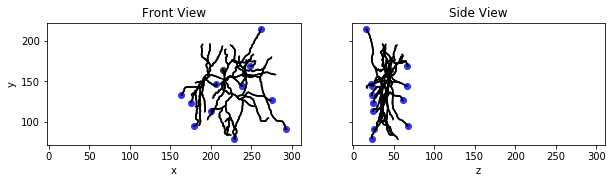

In [92]:
# Import necessary toolboxes
import matplotlib.pyplot as plt
from allensdk.core.swc import Marker

# Set up our plot
fig, axes = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(10,10))
axes[0].set_aspect('equal')
axes[1].set_aspect('equal')

# Make a line drawing of x-y and y-z views
for n in single_cell_morphology.compartment_list:
    for c in single_cell_morphology.children_of(n):
        axes[0].plot([n['x'], c['x']], [n['y'], c['y']], color='black')
        axes[1].plot([n['z'], c['z']], [n['y'], c['y']], color='black')

# cut dendrite markers
dm = [ m for m in markers if m['name'] == Marker.CUT_DENDRITE ]
axes[0].scatter([m['x'] for m in dm], [m['y'] for m in dm], color='#3333ff')
axes[1].scatter([m['z'] for m in dm], [m['y'] for m in dm], color='#3333ff')

# no reconstruction markers
nm = [ m for m in markers if m['name'] == Marker.NO_RECONSTRUCTION ]
axes[0].scatter([m['x'] for m in nm], [m['y'] for m in nm], color='#333333')
axes[1].scatter([m['z'] for m in nm], [m['y'] for m in nm], color='#333333')
axes[0].set_ylabel('y')
axes[0].set_xlabel('x')
axes[1].set_xlabel('z')
axes[0].set_title('Front View')
axes[1].set_title('Side View')
plt.show()